Machine learning models focusing on classification prediction tasks are common and useful tools. One should take care how they are used however as common metrics can be misleading.

Show how structure in data can affect classification models.
    1.) Data that is linearly seperable
    2.) Data that is not linearly seperable but has a cluster in the feature space
    3.) Data that overlap
    4.) Think of other types of data scenarios that could happen

*Show visualizations for all of these.*

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
def generate_normal_distributed_cluster(mean, std, clip, number_data_points):
    """ 
        mean: The mean of the normal distrubution from which data is generated.
        std: Ditto of above, but for the standard deviation.
        clip: The number of standard deviations we want to clip values to. 
    """
    return np.clip(np.random.normal(mean, std, size=number_data_points), mean - std*clip, mean + std*clip)


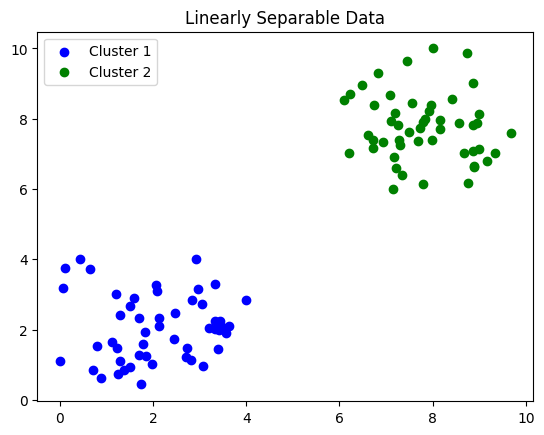

In [9]:
# Create and show data that is linearly seperable
first_half = np.stack((generate_normal_distributed_cluster(2, 1, 2, 50), generate_normal_distributed_cluster(2, 1, 2, 50)), axis=1)
second_half = np.stack((generate_normal_distributed_cluster(8, 1, 2, 50), generate_normal_distributed_cluster(8, 1, 2, 50)), axis=1)
X_lin_sep = np.concatenate((first_half, second_half), axis=0)
y_lin_sep = np.concatenate((np.full((50,), fill_value=0), np.full((50,), fill_value=1)), axis=0)

plt.scatter(first_half[:50, 0], first_half[:50, 1], c='blue', label='Cluster 1')
plt.scatter(second_half[:50, 0],second_half[:50, 1], c='green', label='Cluster 2')
plt.legend()
plt.title("Linearly Separable Data")
plt.show()

(400, 2)
(200,)


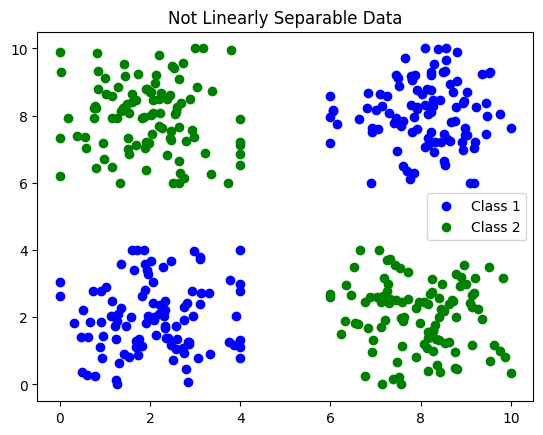

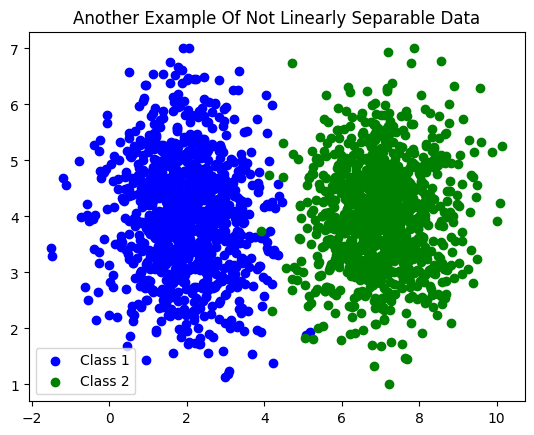

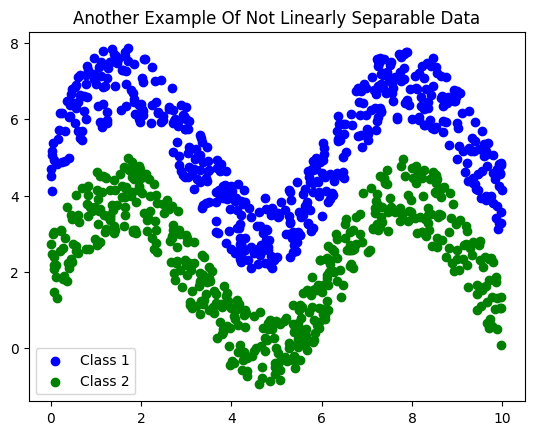

In [10]:
# Show examples of data that is not linearly separable. 
num_data_points = 100

cluster_1_x_values = np.concatenate((generate_normal_distributed_cluster(2, 1, 2, num_data_points), generate_normal_distributed_cluster(8, 1, 2, num_data_points)))
cluster_1_y_values = np.concatenate((generate_normal_distributed_cluster(2, 1, 2, num_data_points), generate_normal_distributed_cluster(8, 1, 2, num_data_points)))
first_half_x = np.stack((cluster_1_x_values, cluster_1_y_values), axis=1)
first_half_y = np.full((num_data_points,), fill_value=0)

cluster_2_x_values = np.concatenate((generate_normal_distributed_cluster(2, 1, 2, num_data_points), generate_normal_distributed_cluster(8, 1, 2, num_data_points)))
cluster_2_y_values = np.concatenate((generate_normal_distributed_cluster(8, 1, 2, num_data_points), generate_normal_distributed_cluster(2, 1, 2, num_data_points)))
second_half_x = np.stack((cluster_1_x_values, cluster_1_y_values), axis=1)
second_half_y = np.full((num_data_points,), fill_value=1)

X_not_lin_sep_1 = np.concatenate((first_half_x, second_half_x), axis=0)
y_not_lin_sep_1 = np.concatenate((first_half_y, second_half_y), axis=0)

print(X_not_lin_sep_1.shape)
print(y_not_lin_sep_1.shape)


plt.scatter(cluster_1_x_values, cluster_1_y_values, c='blue', label='Class 1')
plt.scatter(cluster_2_x_values, cluster_2_y_values, c='green', label='Class 2')
plt.legend()
plt.title("Not Linearly Separable Data")
plt.show()


# Another example of data that is not linearly separable
num_data_points = 1000

cluster_1_x_values = generate_normal_distributed_cluster(2, 1, 3.5, num_data_points)
cluster_1_y_values = generate_normal_distributed_cluster(4, 1, 3, num_data_points)

cluster_2_x_values = generate_normal_distributed_cluster(7, 1, 3.5, num_data_points)
cluster_2_y_values = generate_normal_distributed_cluster(4, 1, 3, num_data_points)

plt.scatter(cluster_1_x_values, cluster_1_y_values, c='blue', label='Class 1')
plt.scatter(cluster_2_x_values, cluster_2_y_values, c='green', label='Class 2')
plt.legend()
plt.title("Another Example Of Not Linearly Separable Data")
plt.show()

# Data that cannot be linearly separated. Show some sine waves. 
x_values_1 = np.random.uniform(0, 10, size=500)
x_values_2 = np.random.uniform(0, 10, size=500)

def get_y_values_from_sine(x_values, intercept: float, noise: bool, noise_range: int):
    if noise:
        return 2*np.sin(x_values) + intercept + np.random.uniform(-noise_range, noise_range, size=len(x_values))
    else:
        return 2*np.sin(x_values) + intercept
    
y_values_1 = get_y_values_from_sine(x_values_1, 5, True, 1)
y_values_2 = get_y_values_from_sine(x_values_2, 2, True, 1)

plt.scatter(x_values_1, y_values_1, c='blue', label='Class 1')
plt.scatter(x_values_2, y_values_2, c='green', label='Class 2')
plt.legend()
plt.title("Another Example Of Not Linearly Separable Data")
plt.show()

We can try to build lines that separate the data from each of the examples generated above.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split()

ValueError: At least one array required as input

Talk about data that is imbalanced.
Show how different scenarios of imbalanced data affect different scoring metrics for a variety of different ML models. Really good visualization here will be very useful. 

In [5]:
# Do the above task

Bring in some real data that exhibits some of the same issues that are shown above

In [6]:
# Do the above task

Show how to solve for many of the issues that are shown above.

In [7]:
# Do the above task